# IMPORT

In [2]:
from google.colab import drive
import os
import numpy as np
import pandas as pd

In [3]:
drive.mount('/content/drive')
path = 'drive/MyDrive/FORECAST'
os.listdir(path)

Mounted at /content/drive


['test.csv', 'train.csv', 'features.csv', 'sampleSubmission.csv', 'stores.csv']

In [4]:
train_csv = pd.read_csv(path+'/train.csv')
features_csv = pd.read_csv(path+'/features.csv')
stores_csv = pd.read_csv(path+'/stores.csv')
print(train_csv)
print(features_csv)
print(stores_csv)

        Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  2010-02-05      24924.50      False
1           1     1  2010-02-12      46039.49       True
2           1     1  2010-02-19      41595.55      False
3           1     1  2010-02-26      19403.54      False
4           1     1  2010-03-05      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False

[421570 rows x 5 columns]
      Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
0         1  2010-02-05        42.31  ...  211.096358         8.106      False
1         1  2010-02-12        38.51  ...  211.242170         8.106       True
2         1  2010-02-19        39.93  ...  211.28914

In [5]:
import matplotlib.pyplot as plt

# HIỂU DỮ LIỆU

Bảng train gồm 5 thuộc tính: Store, Dept, Date, WeeklySales, IsHoliday

In [25]:
print('Dữ liệu: \n',train_csv['Store'],'\n Các giá trị dữ liệu: \n',set(train_csv['Store']), '\n Tổng số giá trị: từ 1 -> 45:', len(set(train_csv['Store'])))

Dữ liệu: 
 0          1
1          1
2          1
3          1
4          1
          ..
421565    45
421566    45
421567    45
421568    45
421569    45
Name: Store, Length: 421570, dtype: int64 
 Các giá trị dữ liệu: 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45} 
 Tổng số giá trị: từ 1 -> 45: 45


Bảng Train có thuộc tính Store ( Cửa hàng ) gồm 45 Store được đánh số từ 1 đến 45 

In [26]:
print('Dữ liệu: \n',train_csv['Dept'],'\n Các giá trị dữ liệu: \n',set(train_csv['Dept']), '\n Tổng số giá trị từ 1 -> 99: ', len(set(train_csv['Dept'])))

Dữ liệu: 
 0          1
1          1
2          1
3          1
4          1
          ..
421565    98
421566    98
421567    98
421568    98
421569    98
Name: Dept, Length: 421570, dtype: int64 
 Các giá trị dữ liệu: 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99} 
 Tổng số giá trị từ 1 -> 99:  81


Bảng train có thuộc tính Dept ( Department - số phòng ban ) gồm 81 giá trị trải từ 1 đến 99

Ngoài ra có một số thuộc tính của bảng train: Date: ngày/ tháng ghi dữ liệu. Weekly sale: Doanh số hàng tuần. IsHoliday ( True/ false): tức là có ngày lễ trong khi kiểm tra doanh số không?

Với bảng Feature:

In [30]:
print("Các thuộc tính:")
for row in features_csv:
  print(row)
print("Tổng thuộc tính: 11")

Các thuộc tính:
Store
Date
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment
IsHoliday
Tổng thuộc tính: 11


Ta nhận thấy Bảng Feature là tập hợp các thuộc tính nhằm giúp ta có các dữ kiện để dự đoán các doanh thu của các cửa hàng. Trong đó có một số thuộc tính quen thuộc như Store ( cửa hàng), Date(ngày tháng), Temperature(nhiệt độ thời tiết), Fuel_Price(giá xăng), IsHoliday(có phải ngày lễ không)

Ngoài ra, còn có các thuộc tính: Markdown1-5 thể hiện các cuộc giảm giá của siêu thị, CPI là chỉ số giá tiêu dùng, Unemployment rate : tỉ lệ thất nghiệp.

Từ việc đọc hiểu dữ liệu trên, ta có thể đưa ra dự đoán ban đầu một cách chủ quan:<br>
- Các feature quan trọng nhất ảnh hưởng nhiều đến tiêu dùng sẽ là: IsHoliday
- Thuộc tính quan trọng ảnh hưởng tuyến tính đến lượng Sales là các thuộc tính còn lại trừ Temp
- Các cửa hàng: Nếu nổi tiếng có vẻ sẽ bán nhiều hơn
- Thuộc tính temp có vẻ sẽ có các ngưỡng, nếu quá thấp sẽ ít người đi mua hàng hơn, nếu quá cao cũng sẽ vậy chứ không tuyến tính
<br>
Để kiểm tra và tiến hành phân tích ý tưởng đó, ta sẽ phân tích dữ liệu

# PHÂN TÍCH DỮ LIỆU

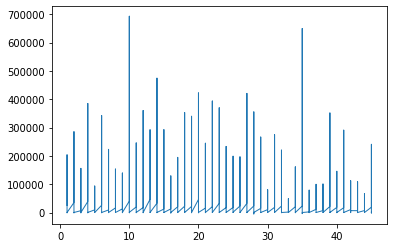

In [39]:
plt.plot(train_csv["Store"],train_csv["Weekly_Sales"],linewidth=1, markersize=12)

Nhận thấy có một số cửa hàng có doanh số mức rất cao (2 cửa hàng), nhiều doanh số trung bình, và một số doanh số rất thấp